In [1]:
import torch
import torchvision
import torchvision.transforms as transforms
import numpy as np

In [2]:
def load_data():
    input_folder = 'combined_stats'
    input_format = 'out'
    feature = 'feature'
    label = 'label'
    X_train = np.loadtxt("{}/{}_{}.{}".format(input_folder, feature, 'training', input_format))
    y_train = np.loadtxt("{}/{}_{}.{}".format(input_folder, label, 'training', input_format))
    X_val = np.loadtxt("{}/{}_{}.{}".format(input_folder, feature, 'validation', input_format))
    y_val = np.loadtxt("{}/{}_{}.{}".format(input_folder, label, 'validation', input_format))
    X_test = np.loadtxt("{}/{}_{}.{}".format(input_folder, feature, 'test', input_format))
    y_test = np.loadtxt("{}/{}_{}.{}".format(input_folder, label, 'test', input_format))
    return X_train, y_train, X_val, y_val, X_test, y_test

In [3]:
X_train, y_train, X_val, y_val, X_test, y_test = load_data()
print(X_train.shape, y_train.shape, X_val.shape, y_val.shape, X_test.shape, y_test.shape)

(1366, 76) (1366,) (106, 76) (106,) (59, 76) (59,)


In [34]:
import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(76, 38)
        self.fc2 = nn.Linear(38, 19)
        self.fc3 = nn.Linear(19, 1)
        self.out_act = nn.Sigmoid()

    def forward(self, x):
        x = x.view(-1, 76)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        y = self.out_act(x)
        return y

net = Net()

In [35]:
import torch.optim as optim

# criterion = nn.CrossEntropyLoss()
criterion = nn.BCELoss()
# optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)
optimizer = optim.Adam(net.parameters(), 0.00001)

In [36]:
n_training = X_train.shape[0]
X_train_tensor = torch.from_numpy(X_train).float()
y_train_tensor = torch.from_numpy(y_train).float()
for epoch in range(20):  # loop over the dataset multiple times

    running_loss = 0.0
    for i in range(n_training):
        # get the inputs
        inputs = X_train_tensor[i][:]
        labels = y_train_tensor[i]
        labels = labels.view(1, -1)
        
        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        # print(outputs, labels)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % n_training == (n_training - 1):    # print every 2000 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 200))
            running_loss = 0.0

print('Finished Training')

[1,  1366] loss: 4.793
[2,  1366] loss: 4.660
[3,  1366] loss: 4.644
[4,  1366] loss: 4.628
[5,  1366] loss: 4.615
[6,  1366] loss: 4.602
[7,  1366] loss: 4.590
[8,  1366] loss: 4.579
[9,  1366] loss: 4.569
[10,  1366] loss: 4.559
[11,  1366] loss: 4.550
[12,  1366] loss: 4.542
[13,  1366] loss: 4.533
[14,  1366] loss: 4.526
[15,  1366] loss: 4.519
[16,  1366] loss: 4.512
[17,  1366] loss: 4.506
[18,  1366] loss: 4.500
[19,  1366] loss: 4.494
[20,  1366] loss: 4.489
Finished Training


In [37]:
correct = 0
total = 0
n_validation = X_val.shape[0]
X_validation_tensor = torch.from_numpy(X_val).float()
y_validation_tensor = torch.from_numpy(y_val).float()
with torch.no_grad():
    for i in range(n_validation):
        inputs = X_validation_tensor[i][:]
        labels = y_validation_tensor[i]
        labels = labels.view(1, -1)
        
        outputs = net(inputs)
        if outputs.data >= 0.5:
            predicted = 1
        else:
            predicted = 0
        total += labels.size(0)
        correct += (predicted == labels).item()
print(total, correct)
print('Accuracy of the network on the validation: %d %%' % (
    100 * correct / total))

106 64
Accuracy of the network on the validation: 60 %


In [38]:
lrs = []
for i in range(5):
    lrs.append(pow(10, -(i + 1)))

n_training = X_train.shape[0]
X_train_tensor = torch.from_numpy(X_train).float()
y_train_tensor = torch.from_numpy(y_train).float()
n_validation = X_val.shape[0]
X_validation_tensor = torch.from_numpy(X_val).float()
y_validation_tensor = torch.from_numpy(y_val).float()

val_accuracy = []

epoch_size = 50
for learning_rate in lrs:
    net = Net()
    criterion = nn.BCELoss()
    optimizer = optim.Adam(net.parameters(), lr = learning_rate)
    for epoch in range(epoch_size):  # loop over the dataset multiple times
        running_loss = 0.0
        for i in range(n_training):
            # get the inputs
            inputs = X_train_tensor[i][:]
            labels = y_train_tensor[i]
            labels = labels.view(1, -1)

            # zero the parameter gradients
            optimizer.zero_grad()

            # forward + backward + optimize
            outputs = net(inputs)
            # print(outputs, labels)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            # print statistics
            running_loss += loss.item()
            if i % n_training == (n_training - 1):    # print every 2000 mini-batches
                print('[%d, %5d] loss: %.3f' %
                      (epoch + 1, i + 1, running_loss / 200))
                running_loss = 0.0
    print('Finished Training')
    correct = 0
    total = 0
    with torch.no_grad():
        for i in range(n_validation):
            inputs = X_validation_tensor[i][:]
            labels = y_validation_tensor[i]
            labels = labels.view(1, -1)

            outputs = net(inputs)
            if outputs.data >= 0.5:
                predicted = 1
            else:
                predicted = 0
            correct += (predicted == labels).item()
    print(n_validation, correct)
    print('Accuracy of the network on the validation: %d %%' % (
        100 * correct / n_validation))
    val_accuracy.append(correct / n_validation)
print('All done')

[1,  1366] loss: 110.130
[2,  1366] loss: 110.110
[3,  1366] loss: 110.110
[4,  1366] loss: 110.110
[5,  1366] loss: 110.110
[6,  1366] loss: 110.110
[7,  1366] loss: 110.110
[8,  1366] loss: 110.110
[9,  1366] loss: 110.110
[10,  1366] loss: 110.110
[11,  1366] loss: 110.110
[12,  1366] loss: 110.110
[13,  1366] loss: 110.110
[14,  1366] loss: 110.110
[15,  1366] loss: 110.110
[16,  1366] loss: 110.110
[17,  1366] loss: 110.110
[18,  1366] loss: 110.110
[19,  1366] loss: 110.110
[20,  1366] loss: 110.110
[21,  1366] loss: 110.110
[22,  1366] loss: 110.110
[23,  1366] loss: 110.110
[24,  1366] loss: 110.110
[25,  1366] loss: 110.110
[26,  1366] loss: 110.110
[27,  1366] loss: 110.110
[28,  1366] loss: 110.110
[29,  1366] loss: 110.110
[30,  1366] loss: 110.110
[31,  1366] loss: 110.110
[32,  1366] loss: 110.110
[33,  1366] loss: 110.110
[34,  1366] loss: 110.110
[35,  1366] loss: 110.110
[36,  1366] loss: 110.110
[37,  1366] loss: 110.110
[38,  1366] loss: 110.110
[39,  1366] loss: 110

In [40]:
print(lrs)
print(val_accuracy)
# best lr = 0.001

[0.1, 0.01, 0.001, 0.0001, 1e-05]
[0.4056603773584906, 0.5943396226415094, 0.6698113207547169, 0.6226415094339622, 0.6132075471698113]


In [42]:
n_training = X_train.shape[0]
X_train_tensor = torch.from_numpy(X_train).float()
y_train_tensor = torch.from_numpy(y_train).float()
n_validation = X_val.shape[0]
X_validation_tensor = torch.from_numpy(X_val).float()
y_validation_tensor = torch.from_numpy(y_val).float()
n_test = X_test.shape[0]
X_test_tensor = torch.from_numpy(X_test).float()
y_test_tensor = torch.from_numpy(y_test).float()

epoches = []
training_acc = []
val_acc = []

epoch_size = 100

# set up the NN
net = Net()
criterion = nn.BCELoss()
optimizer = optim.Adam(net.parameters(), lr = learning_rate)


for epoch in range(epoch_size):  # loop over the dataset multiple times
    running_loss = 0.0
    for i in range(n_training):
        # get the inputs
        inputs = X_train_tensor[i][:]
        labels = y_train_tensor[i]
        labels = labels.view(1, -1)

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        # print(outputs, labels)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % n_training == (n_training - 1):    # print every 2000 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 200))
            running_loss = 0.0
    print('Epoch %d finished Training.' %(epoch + 1))
    
    correct_training = 0
    with torch.no_grad():
        for i in range(n_training):
            inputs = X_train_tensor[i][:]
            labels = y_train_tensor[i]
            labels = labels.view(1, -1)

            outputs = net(inputs)
            if outputs.data >= 0.5:
                predicted = 1
            else:
                predicted = 0
            correct_training += (predicted == labels).item()
    print('Accuracy of the network on the training: %d %%' % (
        100 * correct_training / n_training))
    training_acc.append(correct_training / n_training)

    correct_val = 0
    with torch.no_grad():
        for i in range(n_validation):
            inputs = X_validation_tensor[i][:]
            labels = y_validation_tensor[i]
            labels = labels.view(1, -1)

            outputs = net(inputs)
            if outputs.data >= 0.5:
                predicted = 1
            else:
                predicted = 0
            correct_val += (predicted == labels).item()
    print('Accuracy of the network on the validation: %d %%' % (
        100 * correct_val / n_validation))
    val_acc.append(correct_val / n_validation)
    epoches.append(epoch + 1)
print('Traininig all done')

[1,  1366] loss: 5.003
Epoch 1 finished Training.
Accuracy of the network on the training: 58 %
Accuracy of the network on the validation: 59 %
[2,  1366] loss: 4.648
Epoch 2 finished Training.
Accuracy of the network on the training: 58 %
Accuracy of the network on the validation: 59 %
[3,  1366] loss: 4.640
Epoch 3 finished Training.
Accuracy of the network on the training: 58 %
Accuracy of the network on the validation: 59 %
[4,  1366] loss: 4.631
Epoch 4 finished Training.
Accuracy of the network on the training: 58 %
Accuracy of the network on the validation: 58 %
[5,  1366] loss: 4.620
Epoch 5 finished Training.
Accuracy of the network on the training: 58 %
Accuracy of the network on the validation: 59 %
[6,  1366] loss: 4.610
Epoch 6 finished Training.
Accuracy of the network on the training: 58 %
Accuracy of the network on the validation: 62 %
[7,  1366] loss: 4.602
Epoch 7 finished Training.
Accuracy of the network on the training: 58 %
Accuracy of the network on the validatio

[58,  1366] loss: 4.420
Epoch 58 finished Training.
Accuracy of the network on the training: 62 %
Accuracy of the network on the validation: 62 %
[59,  1366] loss: 4.419
Epoch 59 finished Training.
Accuracy of the network on the training: 62 %
Accuracy of the network on the validation: 62 %
[60,  1366] loss: 4.418
Epoch 60 finished Training.
Accuracy of the network on the training: 62 %
Accuracy of the network on the validation: 62 %
[61,  1366] loss: 4.417
Epoch 61 finished Training.
Accuracy of the network on the training: 62 %
Accuracy of the network on the validation: 62 %
[62,  1366] loss: 4.417
Epoch 62 finished Training.
Accuracy of the network on the training: 62 %
Accuracy of the network on the validation: 62 %
[63,  1366] loss: 4.416
Epoch 63 finished Training.
Accuracy of the network on the training: 62 %
Accuracy of the network on the validation: 62 %
[64,  1366] loss: 4.415
Epoch 64 finished Training.
Accuracy of the network on the training: 62 %
Accuracy of the network on

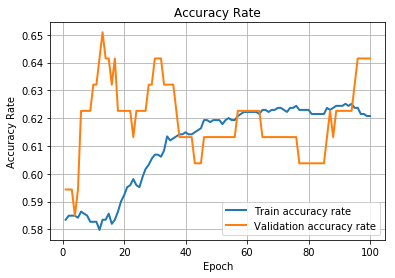

In [51]:
import matplotlib.pyplot as plt
plt.figure()
plt.plot(epoches, training_acc, linewidth = 2, label = 'Train accuracy rate')
plt.plot(epoches, val_acc, linewidth = 2, label='Validation accuracy rate')
plt.title('Accuracy Rate')
plt.xlabel('Epoch')
plt.ylabel('Accuracy Rate')
# plt.xlim([0, epoch_size])
# plt.ylim([0, 1])
plt.legend(loc='best')
plt.grid()
plt.savefig('nn_acc.png')
plt.show()

In [44]:
correct_test = 0
y_pred = []
y_pred1 = []
y_true1 = []
with torch.no_grad():
    for i in range(n_test):
        inputs = X_test_tensor[i][:]
        labels = y_test_tensor[i]
        labels = labels.view(1, -1)

        outputs = net(inputs)
        y_pred.append(outputs.data)
        if outputs.data >= 0.5:
            predicted = 1
        else:
            predicted = 0
        correct_test += (predicted == labels).item()
print('Accuracy of the network on the validation: %d %%' % (
    100 * correct_test / n_test))
print(correct_test, n_test)

Accuracy of the network on the validation: 64 %
38 59


In [46]:
# calculate the AP score
from sklearn.metrics import average_precision_score
y_pred = np.array(y_pred)
ap = average_precision_score(y_test, y_pred)
print(ap)

0.7628915933898056
